<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/analysis/tqqq%20qld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import zipfile
import pandas as pd
import numpy as np
import io
import plotly.graph_objects as go
from scipy.stats import gmean

In [ ]:
# tiingo support tickers
url = 'https://apimedia.tiingo.com/docs/tiingo/daily/supported_tickers.zip'
r = requests.get(url)
zf = zipfile.ZipFile(io.BytesIO(r.content))
df = pd.read_csv(zf.open(zf.namelist()[0]))
df = df[(df['exchange'] == 'NASDAQ') | (df['exchange'] == 'NYSE')]
df = df[df['assetType'] == 'Stock']
df = df[df['ticker'].str.contains("-") == False]
# drop fifth identifier
# https://www.investopedia.com/ask/answers/06/nasdaqfifthletter.asp
mask = (df['ticker'].str.len() < 5)
df = df.loc[mask]
df['endDate'] = pd.to_datetime(df['endDate'])
df['startDate'] = pd.to_datetime(df['startDate'])
nasdaq_df = df[(df['endDate'] == df['endDate'].max()) & (df['exchange'] =='NASDAQ')]
nasdaq_df

ticker exchange assetType priceCurrency  startDate    endDate
6612     AACG   NASDAQ     Stock           USD 2008-01-29 2024-04-24
6616     AACI   NASDAQ     Stock           USD 2021-11-10 2024-04-24
6654     AADI   NASDAQ     Stock           USD 2017-08-08 2024-04-24
6720     AAGR   NASDAQ     Stock           USD 2023-12-07 2024-04-24
6759      AAL   NASDAQ     Stock           USD 2005-09-27 2024-04-24
...       ...      ...       ...           ...        ...        ...
114033   ZURA   NASDAQ     Stock           USD 2021-09-03 2024-04-24
114046   ZVRA   NASDAQ     Stock           USD 2015-04-16 2024-04-24
114047   ZVSA   NASDAQ     Stock           USD 2022-12-12 2024-04-24
114073   ZYME   NASDAQ     Stock           USD 2017-04-28 2024-04-24
114078   ZYXI   NASDAQ     Stock           USD 2012-07-23 2024-04-24

[3369 rows x 6 columns]

In [ ]:
ticker_urls = ['https://stooq.com/q/d/l/?s={}&i=d'.format(ticker) for ticker in nasdaq_df['ticker'].values + '.us']

In [ ]:
tsla = get_df('https://stooq.com/q/d/l/?s=tsla.us&i=d')

In [ ]:
tsla

Open       High        Low      Close       Volume
Date                                                               
2010-06-28    1.13333    1.13333    1.13333    1.13333          NaN
2010-06-29    1.26667    1.66667    1.16933    1.59267  281749140.0
2010-06-30    1.71933    2.02800    1.55333    1.58867  257915910.0
2010-07-01    1.66667    1.72800    1.35133    1.46400  123447945.0
2010-07-02    1.53333    1.54000    1.24733    1.28000   77127105.0
...               ...        ...        ...        ...          ...
2024-04-18  151.25000  152.20000  148.70000  149.93000   96098830.0
2024-04-19  148.97000  150.94000  146.22000  147.01010   86868117.0
2024-04-22  140.56000  144.44000  138.80250  142.05000  107097564.0
2024-04-23  143.33000  147.26000  141.11000  144.68000  124545104.0
2024-04-24  162.84000  167.97000  157.51000  162.13000  181178020.0

[3479 rows x 5 columns]

In [2]:
def get_df(url):
  df = pd.read_csv(url)
  df['Date'] = pd.to_datetime(df['Date'])
  df.index = df['Date']
  df.drop(columns=['Date'], inplace=True)
  return df

In [3]:
nasdaq = get_df('https://stooq.com/q/d/l/?s=^ndx&i=d')
snp = get_df('https://stooq.com/q/d/l/?s=^spx&i=d')

In [4]:
nasdaq

Open       High        Low      Close       Volume
Date                                                               
1985-10-01    110.620    112.160    110.570    112.140   26406897.0
1985-10-02    112.140    112.540    110.780    110.820   28386207.0
1985-10-03    110.840    111.180    110.120    110.870   25396552.0
1985-10-04    110.870    110.870    109.860    110.070   25500000.0
1985-10-07    110.070    110.140    108.180    108.200   22179310.0
...               ...        ...        ...        ...          ...
2024-05-17  18571.820  18590.370  18462.250  18546.230  729240876.0
2024-05-20  18559.220  18703.830  18549.840  18674.190  657506610.0
2024-05-21  18603.990  18721.180  18589.910  18713.800  794089415.0
2024-05-22  18733.550  18756.690  18606.160  18705.200  807346891.0
2024-05-23  18902.273  18905.826  18770.662  18836.357   96355640.0

[9740 rows x 5 columns]

In [5]:
nasdaq['Change'] = nasdaq['Close'].pct_change()+1
nasdaq.dropna(inplace=True)

snp['Change'] = snp['Close'].pct_change()+1
snp.dropna(inplace=True)

In [6]:
nasdaq_1x = (nasdaq['Change'])

In [7]:
# prompt: plot np.cumprod(qld)

fig = go.Figure(data=go.Scatter(x=np.cumprod(nasdaq_1x).index, y=np.cumprod(nasdaq_1x)))
fig.update_layout(
    title="Cumulative Product of nasdaq",
    xaxis_title="Date",
    yaxis_title="Cumulative Product",
)
fig.show()


In [8]:
# prompt: plot only max drawdown

max_drawdown = (np.cumprod(nasdaq_1x) - np.maximum.accumulate(np.cumprod(nasdaq_1x))) / np.maximum.accumulate(np.cumprod(nasdaq_1x))
fig = go.Figure(data=go.Scatter(x=max_drawdown.index, y=max_drawdown))
fig.update_layout(
    title="Max Drawdown of Nasdaq",
    xaxis_title="Date",
    yaxis_title="Max Drawdown",
)
fig.show()


In [9]:
qld = (nasdaq['Change'] - 1) * 2 + 1

In [10]:
# prompt: plot np.cumprod(qld)

fig = go.Figure(data=go.Scatter(x=np.cumprod(qld).index, y=np.cumprod(qld)))
fig.update_layout(
    title="Cumulative Product of QLD",
    xaxis_title="Date",
    yaxis_title="Cumulative Product",
)
fig.show()


In [11]:
# prompt: plot only max drawdown

max_drawdown = (np.cumprod(qld) - np.maximum.accumulate(np.cumprod(qld))) / np.maximum.accumulate(np.cumprod(qld))
fig = go.Figure(data=go.Scatter(x=max_drawdown.index, y=max_drawdown))
fig.update_layout(
    title="Max Drawdown of QLD",
    xaxis_title="Date",
    yaxis_title="Max Drawdown",
)
fig.show()


In [14]:
qld

Date
1985-10-02    0.976458
1985-10-03    1.000902
1985-10-04    0.985569
1985-10-07    0.966022
1985-10-08    0.980776
                ...   
2024-05-17    0.998736
2024-05-20    1.013799
2024-05-21    1.004242
2024-05-22    0.999081
2024-05-23    1.014024
Name: Change, Length: 9739, dtype: float64

In [13]:
gmean(qld)

1.0007813536801653

In [ ]:
tqqq = (nasdaq['Change'] - 1) * 3 + 1

In [ ]:
tqqq_half = np.cumprod(tqqq).iloc[4500:]

In [ ]:
tqqq_half

Date
2003-08-01      10.275235
2003-08-04      10.349353
2003-08-05       9.426764
2003-08-06       9.091233
2003-08-07       9.137021
                 ...     
2024-04-25    1295.017414
2024-04-26    1359.164629
2024-04-29    1373.989537
2024-04-30    1294.708250
2024-05-01    1272.371630
Name: Change, Length: 5223, dtype: float64

In [ ]:
# prompt: plot np.cumprod(tqqq)

fig = go.Figure(data=go.Scatter(x=np.cumprod(tqqq).index, y=np.cumprod(tqqq)))
fig.update_layout(
    title="Cumulative Product of tqqq",
    xaxis_title="Date",
    yaxis_title="Cumulative Product",
)
fig.show()


In [ ]:
# prompt: plot only max drawdown

max_drawdown = (np.cumprod(tqqq) - np.maximum.accumulate(np.cumprod(tqqq))) / np.maximum.accumulate(np.cumprod(tqqq))
fig = go.Figure(data=go.Scatter(x=max_drawdown.index, y=max_drawdown))
fig.update_layout(
    title="Max Drawdown of TQQQ",
    xaxis_title="Date",
    yaxis_title="Max Drawdown",
)
fig.show()


In [ ]:
# prompt: plot np.cumprod(tqqq_half)

fig = go.Figure(data=go.Scatter(x=tqqq_half.index, y=tqqq_half))
fig.update_layout(
    title="Cumulative Product of tqqq_half",
    xaxis_title="Date",
    yaxis_title="Cumulative Product",
)
fig.show()


In [ ]:
# prompt: plot only max drawdown

max_drawdown = (tqqq_half - np.maximum.accumulate(tqqq_half)) / np.maximum.accumulate(tqqq_half)
fig = go.Figure(data=go.Scatter(x=max_drawdown.index, y=max_drawdown))
fig.update_layout(
    title="Max Drawdown of tqqq_half",
    xaxis_title="Date",
    yaxis_title="Max Drawdown",
)
fig.show()


In [ ]:
snp2x = (snp['Change'] - 1) * 2 + 1
snp3x = (snp['Change'] - 1) * 3 + 1

In [ ]:
# prompt: plot np.cumprod(snp2x)

fig = go.Figure(data=go.Scatter(x=np.cumprod(snp2x).index, y=np.cumprod(snp2x)))
fig.update_layout(
    title="Cumulative Product of snp2x",
    xaxis_title="Date",
    yaxis_title="Cumulative Product",
)
fig.show()


In [ ]:
# prompt: plot only max drawdown

max_drawdown = (np.cumprod(snp2x) - np.maximum.accumulate(np.cumprod(snp2x))) / np.maximum.accumulate(np.cumprod(snp2x))
fig = go.Figure(data=go.Scatter(x=max_drawdown.index, y=max_drawdown))
fig.update_layout(
    title="Max Drawdown of snp2x",
    xaxis_title="Date",
    yaxis_title="Max Drawdown",
)
fig.show()


In [ ]:
# prompt: plot np.cumprod(snp3x)

fig = go.Figure(data=go.Scatter(x=np.cumprod(snp3x).index, y=np.cumprod(snp3x)))
fig.update_layout(
    title="Cumulative Product of snp3x",
    xaxis_title="Date",
    yaxis_title="Cumulative Product",
)
fig.show()


In [ ]:
# prompt: plot only max drawdown

max_drawdown = (np.cumprod(snp3x) - np.maximum.accumulate(np.cumprod(snp3x))) / np.maximum.accumulate(np.cumprod(snp3x))
fig = go.Figure(data=go.Scatter(x=max_drawdown.index, y=max_drawdown))
fig.update_layout(
    title="Max Drawdown of snp3x",
    xaxis_title="Date",
    yaxis_title="Max Drawdown",
)
fig.show()


In [ ]:
gmean(tqqq)

1.000735499995132

In [ ]:
gmean(qld)

1.0007657149742573

In [ ]:
gmean(nasdaq_1x)

1.0005186005199305

In [ ]:
gmean(snp['Change'])

1.0003035561631295

In [ ]:
gmean(snp2x)

1.0005070499158104

In [ ]:
gmean(snp3x)

1.0006059199403254

In [ ]:
def get_yearly(df):
  df['Year'] = df.index.year
  df = df.groupby('Year').last()
  df['Change'] = df['Close'].pct_change() + 1
  return df.dropna()

In [ ]:
snp_yearly = get_yearly(snp)
nasdaq_yearly = get_yearly(nasdaq)

In [ ]:
snp_yearly['Change']

Year
1950    1.217780
1951    1.164625
1952    1.117796
1953    0.933760
1954    1.450222
          ...   
2020    1.162589
2021    1.268927
2022    0.805572
2023    1.242305
2024    1.050478
Name: Change, Length: 75, dtype: float64

In [ ]:
from scipy.stats import gmean

gmean(snp_yearly['Change'])

1.078967118071473

In [ ]:
gmean(nasdaq_yearly['Change'])

1.1329538163373027

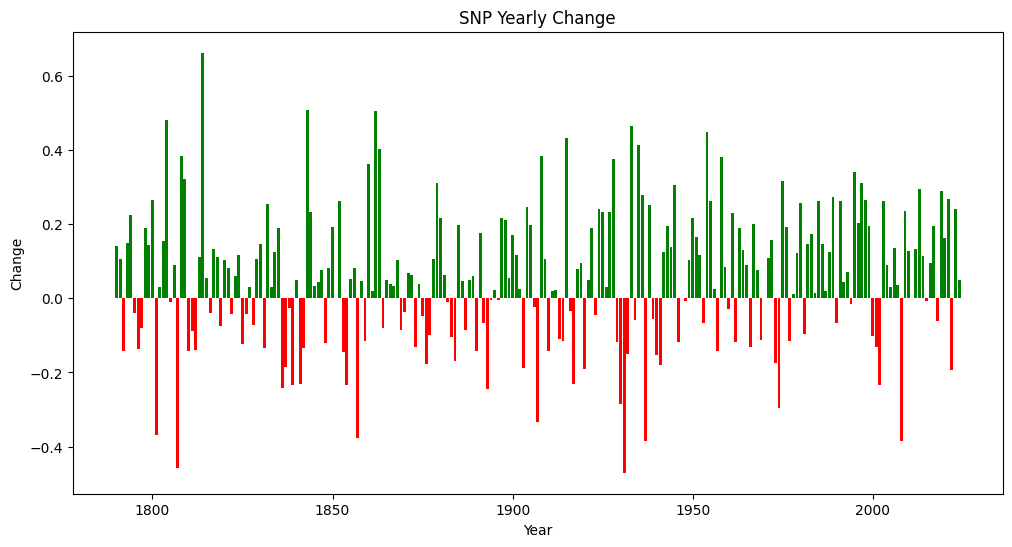

In [ ]:
# prompt: plot snp_yearly['Change'] bar chart to show green for postive and red for negative

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(snp_yearly.index, snp_yearly['Change'], color=['green' if x > 0 else 'red' for x in snp_yearly['Change']])
plt.xlabel('Year')
plt.ylabel('Change')
plt.title('SNP Yearly Change')
plt.show()


In [ ]:
sum(snp_yearly['Change'] > 0) / len(snp_yearly['Change'])

0.6271186440677966

In [ ]:
snp3 = snp_yearly[snp_yearly.index % 3 == 0]
snp3['Change'] = snp3['Close'].pct_change()

snp5 = snp_yearly[snp_yearly.index % 5 == 0]
snp5['Change'] = snp5['Close'].pct_change()

snp10 = snp_yearly[snp_yearly.index % 10 == 0]
snp10['Change'] = snp10['Close'].pct_change()


<ipython-input-101-d0ec800c31fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp3['Change'] = snp3['Close'].pct_change()
<ipython-input-101-d0ec800c31fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snp5['Change'] = snp5['Close'].pct_change()
<ipython-input-101-d0ec800c31fe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
fig = go.Figure(data=[go.Bar(x=snp3.index, y=snp3['Change'], marker_color=['green' if x > 0 else 'red' for x in snp3['Change']])])
fig.update_layout(title='SNP Yearly Change', xaxis_title='Year', yaxis_title='Change')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=snp5.index, y=snp5['Change'], marker_color=['green' if x > 0 else 'red' for x in snp5['Change']])])
fig.update_layout(title='SNP Yearly Change', xaxis_title='Year', yaxis_title='Change')
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=snp10.index, y=snp10['Change'], marker_color=['green' if x > 0 else 'red' for x in snp10['Change']])])
fig.update_layout(title='SNP Yearly Change', xaxis_title='Year', yaxis_title='Change')
fig.show()

In [ ]:
changes = snp_yearly['Change'].dropna() + 1
changes

Year
1790    1.140000
1791    1.105263
1792    0.857143
1793    1.148148
1794    1.225806
          ...   
2020    1.162589
2021    1.268927
2022    0.805572
2023    1.242305
2024    1.050478
Name: Change, Length: 235, dtype: float64

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def geometric_mean(arr):
    return np.prod(arr) ** (1 / len(arr))

# Calculate geometric mean for every 10 years interval
geo_means = []
for start_year in changes.index:
    end_year = start_year + 9
    subset = changes[(changes.index >= start_year) & (changes.index <= end_year)]
    geo_mean = geometric_mean(subset.values)
    geo_means.append(geo_mean)

# Output the results
for mean in enumerate(geo_means):
    print(mean)

(0, 1.046804807994881)
(1, 1.0578218037734948)
(2, 1.0)
(3, 1.018713261236918)
(4, 1.0192177006137195)
(5, 1.0386062665932605)
(6, 1.0418542855862039)
(7, 1.0665569981730385)
(8, 1.011459589672051)
(9, 1.0269264546722878)
(10, 1.0418183126457874)
(11, 1.0019822247447452)
(12, 1.0397148331671677)
(13, 1.0209810068151601)
(14, 1.0172621233728307)
(15, 1.0291860089647606)
(16, 1.03555505101689)
(17, 1.0225651825635729)
(18, 1.1009144104583388)
(19, 1.0770154403043632)
(20, 1.0393195790052083)
(21, 1.065849077683084)
(22, 1.0843421349656681)
(23, 1.0959582263852172)
(24, 1.0906730584518836)
(25, 1.0482108796923613)
(26, 1.0291860089647606)
(27, 1.0286702544461999)
(28, 1.018897493723777)
(29, 1.0005278449712378)
(30, 1.0183993761470242)
(31, 1.022459167813353)
(32, 1.0)
(33, 1.0273705907571677)
(34, 1.024478362517842)
(35, 1.0252092683823126)
(36, 1.056974533291627)
(37, 1.0324992589887554)
(38, 1.0084516948339102)
(39, 1.0133759969712426)
(40, 0.9767622786166879)
(41, 0.9679506606305202)


In [ ]:
geo_means[::9]

[1.046804807994881,
 1.0269264546722878,
 1.1009144104583388,
 1.0286702544461999,
 1.056974533291627,
 0.9664024376788282,
 1.058159820292016,
 0.9895192582062144,
 1.085864817471837,
 1.0250769406108635,
 1.0195183537751995,
 1.0120107614435232,
 1.0303315806261404,
 0.9992295802013541,
 1.0266574092822438,
 0.9827985706402408,
 1.0145534878398124,
 1.1052224527026864,
 1.1164982472805538,
 1.0471874925161586,
 1.0160407919222978,
 1.1119464123172227,
 1.1466019132744698,
 1.0671125574255524,
 1.050546463584241,
 1.0930133037338197,
 1.0504776899805655]

In [ ]:
# prompt: plot geo_means[::9]

fig = go.Figure(data=[go.Scatter(x=list(range(0, len(geo_means[::9]))), y=geo_means[::9])])
fig.update_layout(title='Geometric Mean of SNP Yearly Change (Every 10 Years)', xaxis_title='Decade', yaxis_title='Geometric Mean')
fig.show()
